<a href="https://colab.research.google.com/github/anudaindu/CM2604_Telco_Churn_Anuda/blob/main/AnudaTelco.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [12]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [13]:
!git config --global user.email "anudaindu@gmail.com"
!git config --global user.name "anudaindu"


In [4]:
!git clone https://github.com/anudaindu/Telco_Churn_Anuda.git

Cloning into 'Telco_Churn_Anuda'...
fatal: could not read Username for 'https://github.com': No such device or address


In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [15]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [16]:
import pandas as pd

df = pd.read_csv('/WA_Fn-UseC_-Telco-Customer-Churn.csv')
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [17]:
df.tail()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes
7042,3186-AJIEK,Male,0,No,No,66,Yes,No,Fiber optic,Yes,...,Yes,Yes,Yes,Yes,Two year,Yes,Bank transfer (automatic),105.65,6844.5,No


In [18]:
df.shape

(7043, 21)

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [20]:
df.isnull().sum()

,0
customerID,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0
OnlineSecurity,0


In [21]:
df.duplicated().sum()

np.int64(0)

In [22]:
for i in df.select_dtypes(include='object').columns:
  print(df[i].value_counts())

customerID
3186-AJIEK    1
7590-VHVEG    1
5575-GNVDE    1
8775-CEBBJ    1
2823-LKABH    1
             ..
6713-OKOMC    1
1452-KIOVK    1
9305-CDSKC    1
9237-HQITU    1
7795-CFOCW    1
Name: count, Length: 7043, dtype: int64
gender
Male      3555
Female    3488
Name: count, dtype: int64
Partner
No     3641
Yes    3402
Name: count, dtype: int64
Dependents
No     4933
Yes    2110
Name: count, dtype: int64
PhoneService
Yes    6361
No      682
Name: count, dtype: int64
MultipleLines
No                  3390
Yes                 2971
No phone service     682
Name: count, dtype: int64
InternetService
Fiber optic    3096
DSL            2421
No             1526
Name: count, dtype: int64
OnlineSecurity
No                     3498
Yes                    2019
No internet service    1526
Name: count, dtype: int64
OnlineBackup
No                     3088
Yes                    2429
No internet service    1526
Name: count, dtype: int64
DeviceProtection
No                     3095
Yes               

In [23]:
df.rename(columns={
    'tenure': 'CustomerDuration',
    'SeniorCitizen': 'IsSeniorCitizen',
    'Partner': 'HasPartner',
    'Dependents': 'HasDependents',
    'PhoneService': 'HasPhoneService',
    'MultipleLines': 'HasMultipleLines',
    'OnlineSecurity': 'HasOnlineSecurity',
    'OnlineBackup': 'HasOnlineBackup',
    'DeviceProtection': 'HasDeviceProtection',
    'TechSupport': 'HasTechSupport',
    'StreamingTV': 'HasStreamingTV',
    'StreamingMovies': 'HasStreamingMovies',
    'PaperlessBilling': 'IsPaperlessBilling'
}, inplace=True)


In [24]:
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

In [25]:
df.loc[df['CustomerDuration'] == 0, 'TotalCharges'] = 0


In [26]:
df['IsSeniorCitizen'] = df['IsSeniorCitizen'].map({0: 'No', 1: 'Yes'})


In [27]:
df.info()
df.isnull().sum()
df.describe()
df.duplicated().sum()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   customerID           7043 non-null   object 
 1   gender               7043 non-null   object 
 2   IsSeniorCitizen      7043 non-null   object 
 3   HasPartner           7043 non-null   object 
 4   HasDependents        7043 non-null   object 
 5   CustomerDuration     7043 non-null   int64  
 6   HasPhoneService      7043 non-null   object 
 7   HasMultipleLines     7043 non-null   object 
 8   InternetService      7043 non-null   object 
 9   HasOnlineSecurity    7043 non-null   object 
 10  HasOnlineBackup      7043 non-null   object 
 11  HasDeviceProtection  7043 non-null   object 
 12  HasTechSupport       7043 non-null   object 
 13  HasStreamingTV       7043 non-null   object 
 14  HasStreamingMovies   7043 non-null   object 
 15  Contract             7043 non-null   o

np.int64(0)

Task 1  EDA



In [28]:
#descriptive statistics
df.describe().T

,count,mean,std,min,25%,50%,75%,max
CustomerDuration,7043.0,32.371149,24.559481,0.00,9.00,29.00,55.00,72.00
MonthlyCharges,7043.0,64.761692,30.090047,18.25,35.50,70.35,89.85,118.75
TotalCharges,7043.0,2279.734304,2266.794470,0.00,398.55,1394.55,3786.60,8684.80


In [37]:
df.describe(include="object")

,customerID,gender,HasPartner,HasDependents,HasPhoneService,HasMultipleLines,InternetService,HasOnlineSecurity,HasOnlineBackup,HasDeviceProtection,HasTechSupport,HasStreamingTV,HasStreamingMovies,Contract,IsPaperlessBilling,PaymentMethod,Churn
count,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043
unique,7043,2,2,2,2,3,3,3,3,3,3,3,3,3,2,4,2
top,3186-AJIEK,Male,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,No
freq,1,3555,3641,4933,6361,3390,3096,3498,3088,3095,3473,2810,2785,3875,4171,2365,5174


In [21]:
#Target variabe analysis
df['Churn'].value_counts()

,count
Churn,
No,5174
Yes,1869


In [23]:
(df['Churn'].value_counts(normalize=True) * 100)


,proportion
Churn,
No,73.463013
Yes,26.536987


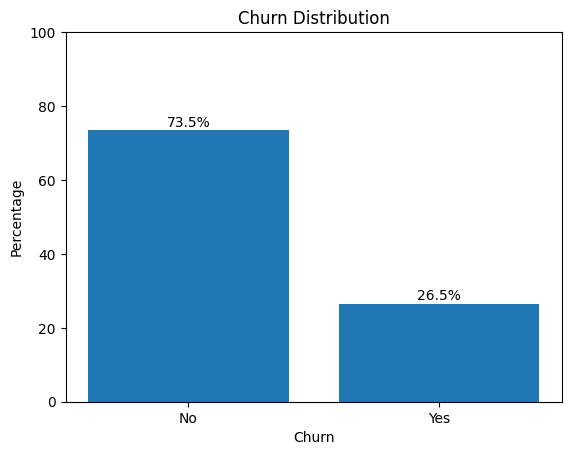

In [24]:
counts = df['Churn'].value_counts()
percentages = counts / len(df) * 100

bars = plt.bar(counts.index, percentages)
plt.title('Churn Distribution')
plt.xlabel('Churn')
plt.ylabel('Percentage')

for bar in bars:
    y = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, y + 1, f'{y:.1f}%',
             ha='center')

plt.ylim(0,100)
plt.show()


Dataset is inbalanced
26% churn, 74% non churn

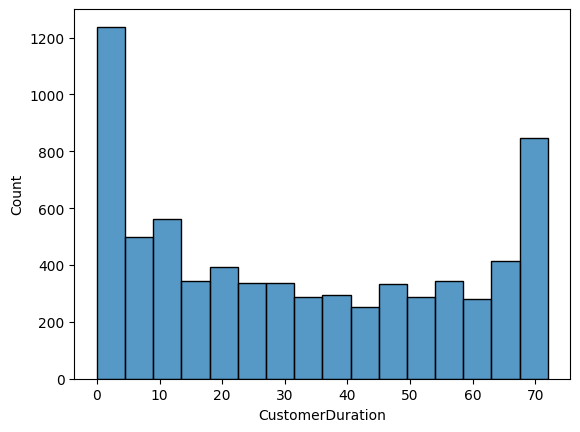

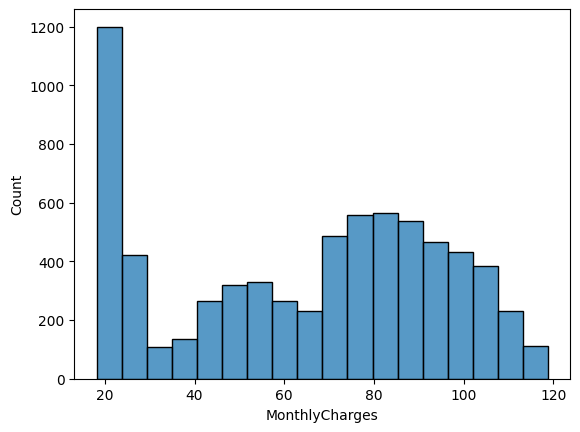

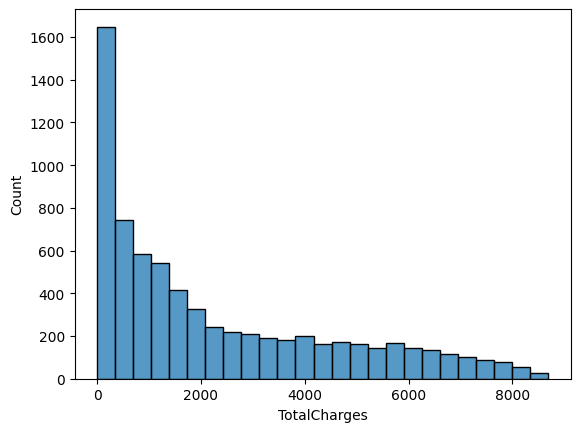

In [43]:
#histogram to understand the distribution
for i in df.select_dtypes(include='number').columns:
  sns.histplot(data=df,x=i)
  plt.show()


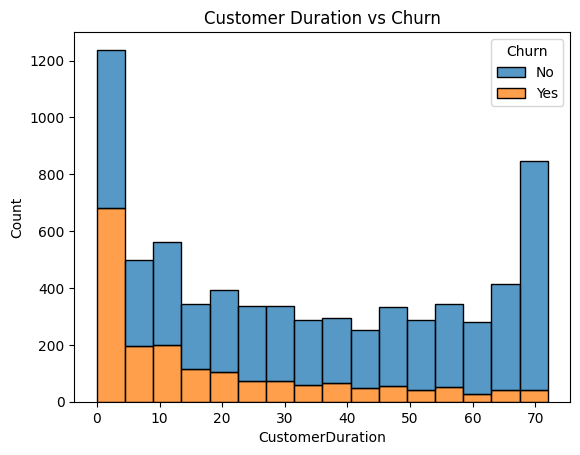

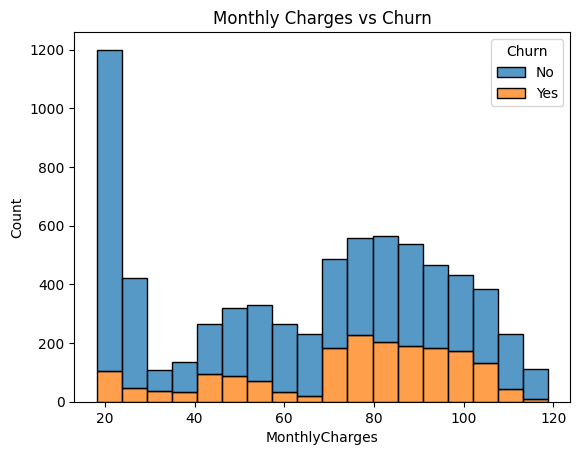

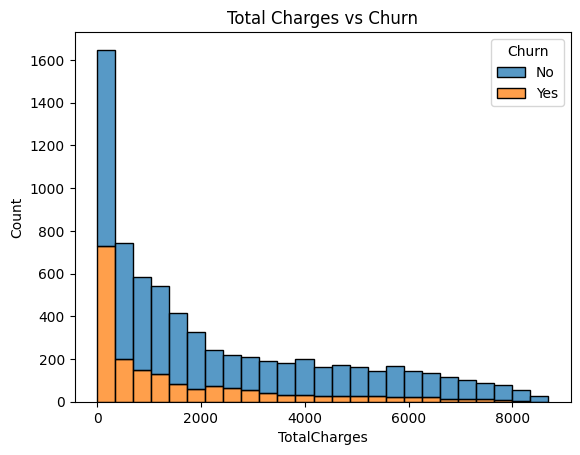

In [43]:
# Customer Duration vs Churn
sns.histplot(data=df, x='CustomerDuration', hue='Churn', multiple='stack')
plt.title('Customer Duration vs Churn')
plt.show()

# Monthly Charges vs Churn
sns.histplot(data=df, x='MonthlyCharges', hue='Churn', multiple='stack')
plt.title('Monthly Charges vs Churn')
plt.show()

#Total Charge vs Churn
sns.histplot(data=df, x='TotalCharges', hue='Churn', multiple='stack')
plt.title('Total Charges vs Churn')
plt.show()

short tenure goes to hugher churn, higher monthly charges goes to higher churn

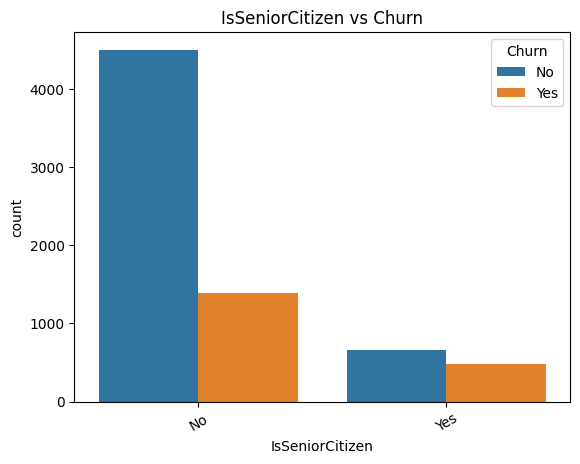

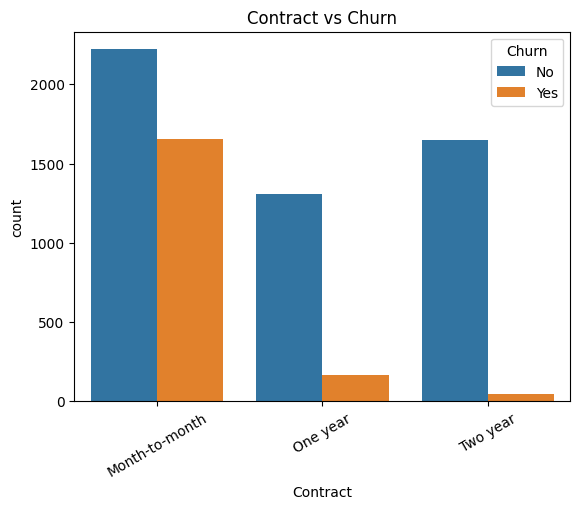

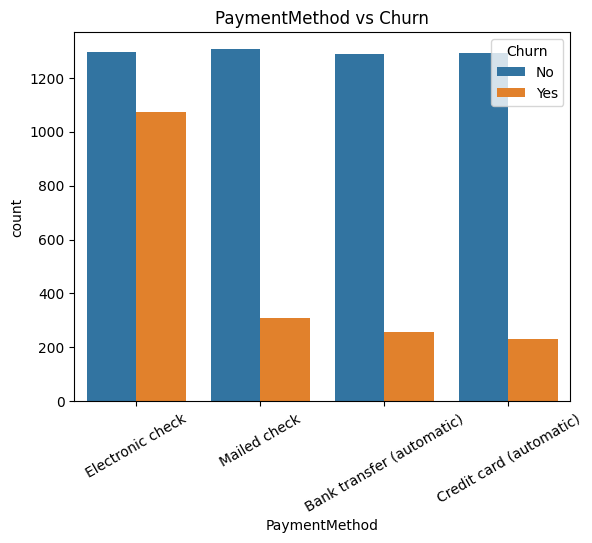

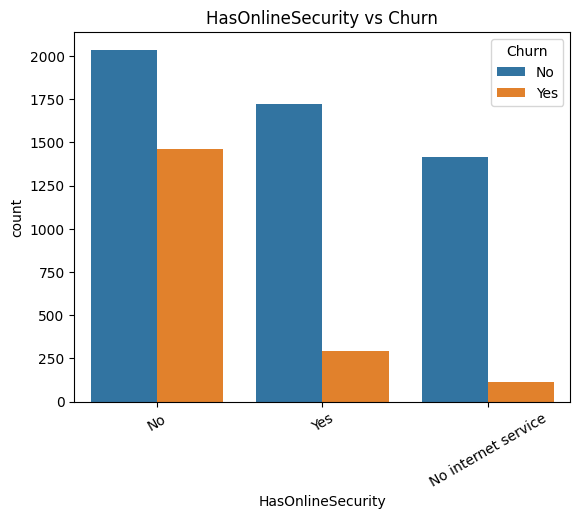

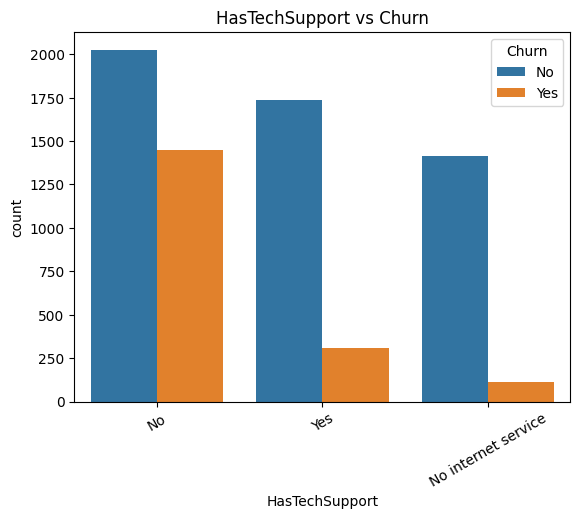

In [33]:
#Categorical vs Churn
cat_cols = [
    'IsSeniorCitizen','Contract','PaymentMethod',
    'HasOnlineSecurity','HasTechSupport'
]

for col in cat_cols:
    sns.countplot(x=col, hue='Churn', data=df)
    plt.xticks(rotation=30)
    plt.title(f'{col} vs Churn')
    plt.show()



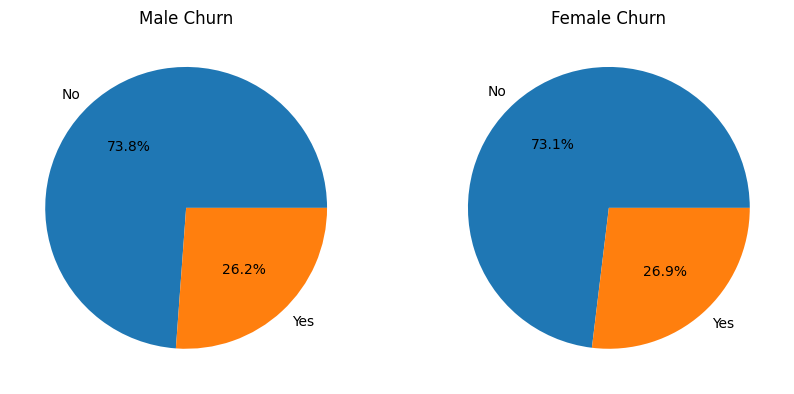

In [36]:
male = df[df['gender'] == 'Male']['Churn'].value_counts()
female = df[df['gender'] == 'Female']['Churn'].value_counts()

fig, axes = plt.subplots(1, 2, figsize=(10,5))
axes[0].pie(male, labels=male.index, autopct='%1.1f%%')
axes[0].set_title('Male Churn')

axes[1].pie(female, labels=female.index, autopct='%1.1f%%')
axes[1].set_title('Female Churn')
plt.show()

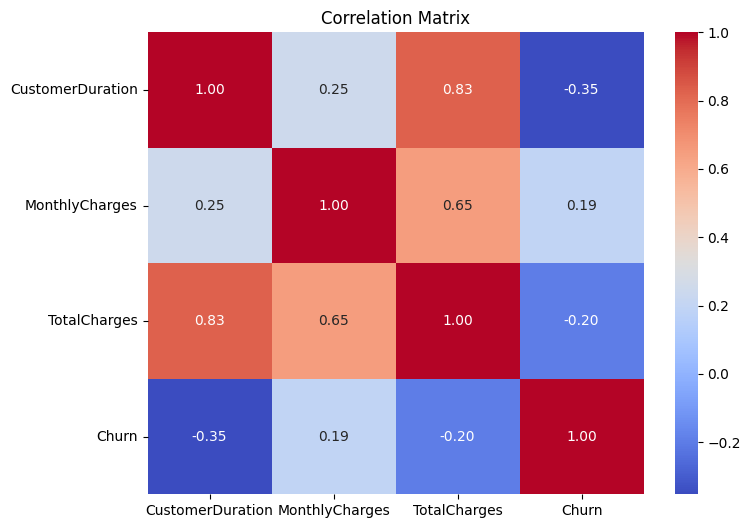

In [33]:
#corelation Alaysis
df_corr = df.copy()
df_corr['Churn'] = df_corr['Churn'].map({'Yes':1, 'No':0})

plt.figure(figsize=(8,6))
sns.heatmap(df_corr.select_dtypes(include='number').corr(),
            annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()


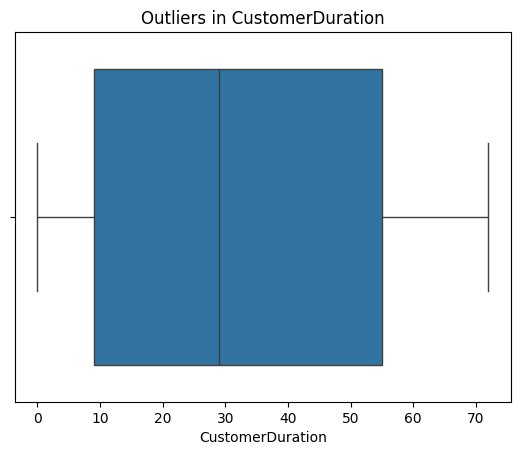

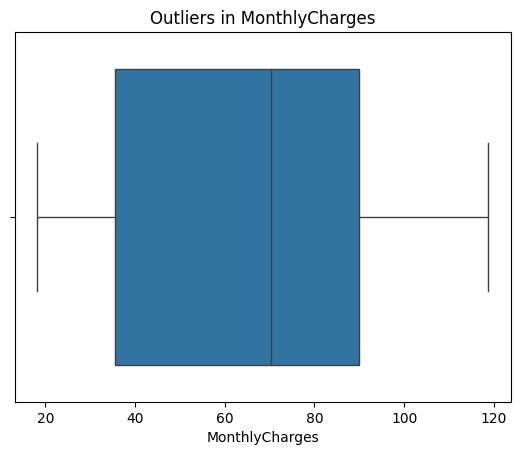

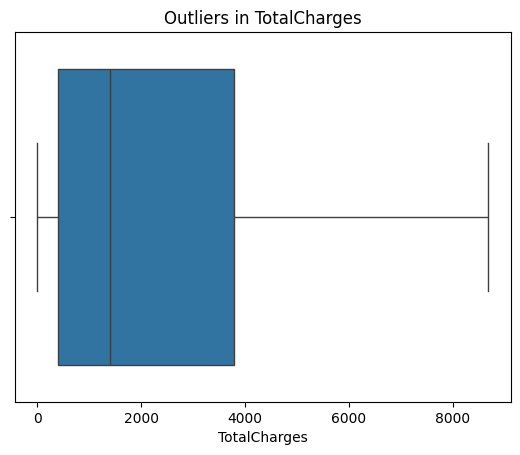

In [35]:
#Outlier ditection
for col in df.select_dtypes(include='number').columns:
    sns.boxplot(x=df[col])
    plt.title(f'Outliers in {col}')
    plt.show()
